In [23]:
#We are trying to predict if the client left the company in the previous month.
#Therefore we have a binary classification problem with a slightly unbalanced target:

import pandas  as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
Telecom_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# now that we imported the data lets grab a peek and understand all are columns
Telecom_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Explanation for all columns

**gender**  -     male/female

**SeniorCitizen**   - is the customer a seniorcitizen(old)

**Partner**          -   Whether the customer has a partner or not 

**Dependents**        -  Whether the customer has dependents or not

**tenure**             - Number of months the customer has been with the company

**PhoneService**     -   Whether the customer has a phone service or not (Yes, No)

**MultipleLines**     -  Whether the customer has multiple lines or not (Yes, No, No Phone Service)

**InternetService**   -  Customer’s internet service type (DSL, Fiber Optic, None)

**OnlineSecurity**   -   Whether the customer has Online Security add-on (Yes, No, No Internet Service)

**OnlineBackup**     -   Whether the customer has Online Backup add-on (Yes, No, No Internet Service)

**DeviceProtection**  -  Whether the customer has Device Protection add-on (Yes, No, No Internet Service)

**TechSupport**      -   Whether the customer has Tech Support add-on (Yes, No, No Internet Service)

**StreamingTV**       -  Whether the customer has streaming TV or not (Yes, No, No Internet Service)

**StreamingMovies**   -  Whether the customer has streaming movies or not (Yes, No, No Internet Service)

**Contract**         -   Term of the customer’s contract (Monthly, 1-Year, 2-Year)

**PaperlessBilling**  -  PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod**     -  The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

**MonthlyCharges**   -   The monthly amount charged to the customer

**TotalCharges**     -   The total amount charged to the customer

**Churn**           -    Had the Customer  left within the last month 

In [24]:
Telecom_churn.dtypes
#as we can see we have 3 numerical columns and 18 object columns. we will soon deal with this making sure to change all data to numerical

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
#lets look at what null values we have
Telecom_churn.TotalCharges = pd.to_numeric(Telecom_churn.TotalCharges, errors='coerce')
Telecom_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
#since its only 11 missing values we will remove them
Telecom_churn = Telecom_churn.dropna()
Telecom_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
#We can see there is no need for customerID so lets drop that column.
df1 = Telecom_churn.iloc[:,1:]
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
#My goal in this is project is to predict whether a given client will churn or not , lets focus on that , by understanding and searching for coralation with churn
df1['Churn'].value_counts(sort = False)


Yes    1869
No     5163
Name: Churn, dtype: int64

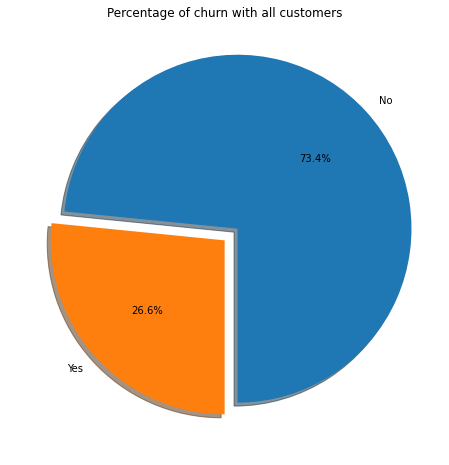

In [29]:
#lets see are main column in a graph using a pie from matplotlyb

labels =df1['Churn'].value_counts(sort = True).index
sizes = df1['Churn'].value_counts(sort = True)



explode = (0.1,0)  # explode 1st slice
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=270,) #autopct adds percents

plt.title('Percentage of churn with all customers')
plt.show()